_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll use information about the shot and the game to predict whether the shot was made. This is hard to predict! Try for an accuracy score in the high 50's or low 60's. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [1]:
import numpy as np
import pandas_profiling as pp
import matplotlib
# matplotlib.use("TkAgg")
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url, parse_dates=['game_date']).set_index('game_date')
assert df.shape == (13958, 19)

This Sprint Challenge has two parts. To demonstrate mastery on each part, do all the required, numbered instructions. To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Prepare to model

### Required

1. **Do train/validate/test split.** Use the 2009-10 season through 2016-17 season to train, the 2017-18 season to validate, and the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your train set has 11081 observations, your validation set has 1168 observations, and your test set has 1709 observations.
2. **Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is the baseline accuracy for the validation set, if you guessed the majority class for every prediction?
3. **Use Ordinal Encoding _or_ One-Hot Encoding,** for the categorical features you select.
4. **Train a Random Forest _or_ Logistic Regression** with the features you select.

### Stretch goals
Engineer at least 4 of these 5 features:

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?
    

## Part 2. Evaluate models

### Required
1. Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.)
2. Get your model's **test accuracy.** (One time, at the end.)
3. Get and plot your Random Forest's **feature importances** _or_ your Logistic Regression's **coefficients.**
4. Imagine this is the confusion matrix for a binary classification model. **Calculate accuracy, precision, and recall for this confusion matrix:**

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>


### Stretch goals
- Calculate F1 score for the provided, imaginary confusion matrix.
- Plot a real confusion matrix for your basketball model, with row and column labels.
- Print the classification report for your model.

In [3]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0


In [4]:
df.isnull().sum()

game_id                    0
game_event_id              0
player_name                0
period                     0
minutes_remaining          0
seconds_remaining          0
action_type                0
shot_type                  0
shot_zone_basic            0
shot_zone_area             0
shot_zone_range            0
shot_distance              0
loc_x                      0
loc_y                      0
shot_made_flag             0
htm                        0
vtm                        0
season_type                0
scoremargin_before_shot    0
dtype: int64

In [5]:
pp.ProfileReport(df)

In [6]:
df[:'2017-07-01'].shape

(11081, 19)

In [7]:
df['2017-08-01':'2018-07-01'].shape

(1168, 19)

In [8]:
df['2018-08-01':'2019-07-01'].shape

(1709, 19)

In [9]:
df = df.drop(columns=['player_name'])

In [10]:
def hometeam(row):
    if row['htm'] == 'GSW':
        return 1
    else:
        return 0

In [11]:
df['hometeam'] = df.apply(lambda row: hometeam(row), axis=1)

In [12]:
def sec_remain_period(row):
    return (row['minutes_remaining'] * 60) + row['seconds_remaining']

In [13]:
df['sec_remain_period'] = df.apply(lambda row: sec_remain_period(row), axis=1)

In [14]:
def sec_remain_game(row):
    return ((4 - row['period']) * 12 * 60) + row['sec_remain_period']

In [15]:
df['sec_remain_game'] = df.apply(lambda row: sec_remain_game(row), axis=1)

In [16]:
def opponent(row):
    if row['hometeam'] == 1:
        return row['vtm']
    else:
        return row['htm']

In [17]:
df['opponent'] = df.apply(lambda row: opponent(row), axis=1)

In [18]:
df.head()

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,...,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,hometeam,sec_remain_period,sec_remain_game,opponent
game_date,,,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,...,249,0,GSW,HOU,Regular Season,2.0,1,685,2845,HOU
2009-10-28,20900015,17,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,...,145,1,GSW,HOU,Regular Season,0.0,1,571,2731,HOU
2009-10-28,20900015,53,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,...,129,0,GSW,HOU,Regular Season,-4.0,1,362,2522,HOU
2009-10-28,20900015,141,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,...,82,0,GSW,HOU,Regular Season,-4.0,1,589,2029,HOU
2009-10-28,20900015,249,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,...,148,0,GSW,HOU,Regular Season,0.0,1,139,1579,HOU


In [19]:
train = df[:'2017-07-01']
validate = df['2017-08-01':'2018-07-01']
test = df['2018-08-01':'2019-07-01']

In [20]:
target = 'shot_made_flag'

In [21]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = validate.drop(columns=target)
y_val = validate[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [22]:
majority = y_train.mode()[0]

In [23]:
baseline_pred = [majority] * len(y_train)

In [24]:
accuracy_score(y_train, baseline_pred)

0.5272087356736757

In [25]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth=60, n_estimators=50))

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['action_type', 'shot_type', 'shot_zone_basic', 'shot_zone_area', 'shot_zone_range', 'htm', 'vtm', 'season_type', 'opponent'],
       drop_invariant=False, handle_missing='value',
       handle_unknown='value', return_df=True, use_cat_names=True,
       ve...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [27]:
pipeline.score(X_val, y_val)

0.589041095890411

In [28]:
pipeline.score(X_test, y_test)

0.6120538326506729

In [29]:
encoder = pipeline.named_steps['onehotencoder']

forest = pipeline.named_steps['randomforestclassifier']

feature_names = encoder.transform(X_val).columns
importances = pd.Series(forest.feature_importances_, feature_names)

In [30]:
len(df.columns)

22

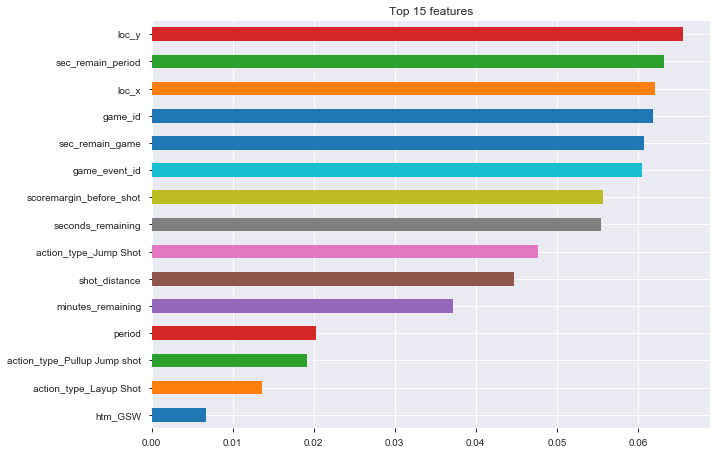

In [31]:
n = 15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh()
plt.show()

In [32]:
importances.sort_values(ascending=False)

loc_y                                             6.559223e-02
sec_remain_period                                 6.323699e-02
loc_x                                             6.210301e-02
game_id                                           6.185637e-02
sec_remain_game                                   6.074089e-02
game_event_id                                     6.050250e-02
scoremargin_before_shot                           5.573948e-02
seconds_remaining                                 5.544277e-02
action_type_Jump Shot                             4.773378e-02
shot_distance                                     4.472442e-02
minutes_remaining                                 3.721679e-02
period                                            2.024538e-02
action_type_Pullup Jump shot                      1.920706e-02
action_type_Layup Shot                            1.365115e-02
htm_GSW                                           6.655129e-03
vtm_GSW                                           6.543

In [33]:
y_pred = pipeline.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       912
           1       0.59      0.55      0.57       797

   micro avg       0.61      0.61      0.61      1709
   macro avg       0.61      0.61      0.61      1709
weighted avg       0.61      0.61      0.61      1709



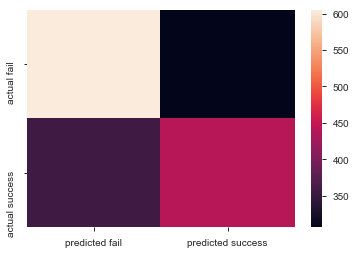

In [40]:
def plot_confusion_matrix(y_true, y_pred):
  labels = unique_labels(y_true)
  columns = [f'predicted {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                     columns=columns, index=index)
  return sns.heatmap(table, fmt=True, xticklabels=["predicted fail","predicted success"], yticklabels=["actual fail", "actual success"])

plot_confusion_matrix(y_test, y_pred)

``` example matrix: calculate accuracy, precision, recall ```

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>


In [41]:
correct_predictions = 85 + 36

total_predictions = correct_predictions + 8 + 58

print('Accuracy:', correct_predictions / total_predictions)

Accuracy: 0.6470588235294118


In [42]:
print(f'Precision: {36 / (58+36)}')

Precision: 0.3829787234042553


In [43]:
print(f'Recall: {36 / (8+36)}')

Recall: 0.8181818181818182


In [44]:
f1 = 2 * ((0.3829787234042553 * 0.8181818181818182) / (0.3829787234042553 + 0.8181818181818182))

In [45]:
print('F1: ', f1)

F1:  0.5217391304347826
